# Home Credit Data Scientist Assignment

## Read Raw Data

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', None)


import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore')

import os


file_path = os.path.join('data', 'it_data.csv')

df_raw = pd.read_csv(file_path)

df_raw.head()

,ID_APPLICATION,TIME,NUMERICAL_0,NUMERICAL_1,NUMERICAL_2,NUMERICAL_3,NUMERICAL_4,NUMERICAL_5,NUMERICAL_6,NUMERICAL_7,...,CATEGORICAL_2,CATEGORICAL_3,CATEGORICAL_4,CATEGORICAL_5,CATEGORICAL_6,CATEGORICAL_7,CATEGORICAL_8,CATEGORICAL_9,CATEGORICAL_10,TARGET
0,0,2014-06-20 11:03:04,0.548205,6.273278,-0.557716,-0.086105,-0.726799,-0.523021,0.571528,0.176804,...,AB,DF,JK,TR,C,A,BB,AA,NFAYV,1
1,1,2014-06-20 11:05:39,-0.640991,5.662506,0.050086,0.233125,0.482266,0.085460,-0.552130,-0.017248,...,AA,DF,JK,WE,A,A,AA,BB,NFAYV,0
2,2,2014-06-20 11:07:00,0.394312,5.782492,-0.421450,0.756713,0.408276,0.327221,-0.905630,-0.941560,...,AB,AS,GH,TR,C,C,BB,BB,NFAYV,0
3,3,2014-06-20 11:09:38,-0.320658,4.736009,0.334894,1.092682,0.646294,1.541267,0.966884,-0.790725,...,AB,AS,GH,TR,A,A,AA,BB,HNPAK,0
4,4,2014-06-20 11:11:10,0.433235,5.323432,0.826207,0.718267,-1.627944,2.203108,0.420342,-0.223997,...,NaN,NaN,NaN,NaN,B,B,BB,BB,NFAYV,0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 56 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID_APPLICATION  200000 non-null  int64  
 1   TIME            200000 non-null  object 
 2   NUMERICAL_0     200000 non-null  float64
 3   NUMERICAL_1     200000 non-null  float64
 4   NUMERICAL_2     200000 non-null  float64
 5   NUMERICAL_3     200000 non-null  float64
 6   NUMERICAL_4     200000 non-null  float64
 7   NUMERICAL_5     200000 non-null  float64
 8   NUMERICAL_6     200000 non-null  float64
 9   NUMERICAL_7     200000 non-null  float64
 10  NUMERICAL_8     200000 non-null  float64
 11  NUMERICAL_9     200000 non-null  float64
 12  NUMERICAL_10    143749 non-null  float64
 13  NUMERICAL_11    200000 non-null  float64
 14  NUMERICAL_12    200000 non-null  float64
 15  NUMERICAL_13    200000 non-null  float64
 16  NUMERICAL_14    200000 non-null  float64
 17  NUMERICAL_

## Handle DateTime
Add:
- Date: yyyy-MM-dd
- Month: yyyy-MM
- Months Columns: month_1, month_2...
- Dates Columns: date_1, date_2...
- DOW Columns: dow_0, dow_1...
- Hour: HH

Not enough time to do:
- Is Holiday: 0, 1
- Days Before next holiday
- Days After last holiday

In [5]:
# Time Part
df_raw['TIME_FORMAT'] = pd.to_datetime(df_raw['TIME'])

df_raw['DATE_APPLICATION'] = df_raw['TIME_FORMAT'].dt.date
df_raw['YEAR_MONTH_APPLICATION'] = df_raw['TIME_FORMAT'].dt.strftime('%b %Y')

df_raw['YEAR_APPLICATION'] = df_raw['TIME_FORMAT'].dt.year
df_raw['MONTH_APPLICATION'] = df_raw['TIME_FORMAT'].dt.month
df_raw['DAY_APPLICATION'] = df_raw['TIME_FORMAT'].dt.day
df_raw['DOW_APPLICATION'] = df_raw['TIME_FORMAT'].dt.day_of_week

df_raw['HOUR_APPLICATION'] = df_raw['TIME_FORMAT'].dt.hour

# Holiday


time_col = ['TIME', 
            'TIME_FORMAT', 
            'DATE_APPLICATION', 
            'YEAR_MONTH_APPLICATION', 
            'YEAR_APPLICATION', 
            'MONTH_APPLICATION', 
            'DAY_APPLICATION', 
            'DOW_APPLICATION', 
            'HOUR_APPLICATION']

cat_time_col = ['MONTH_APPLICATION', 
                'DAY_APPLICATION', 
                'DOW_APPLICATION',]

df_raw[time_col].head()

,TIME,TIME_FORMAT,DATE_APPLICATION,YEAR_MONTH_APPLICATION,YEAR_APPLICATION,MONTH_APPLICATION,DAY_APPLICATION,DOW_APPLICATION,HOUR_APPLICATION
0,2014-06-20 11:03:04,2014-06-20 11:03:04,2014-06-20,Jun 2014,2014,6,20,4,11
1,2014-06-20 11:05:39,2014-06-20 11:05:39,2014-06-20,Jun 2014,2014,6,20,4,11
2,2014-06-20 11:07:00,2014-06-20 11:07:00,2014-06-20,Jun 2014,2014,6,20,4,11
3,2014-06-20 11:09:38,2014-06-20 11:09:38,2014-06-20,Jun 2014,2014,6,20,4,11
4,2014-06-20 11:11:10,2014-06-20 11:11:10,2014-06-20,Jun 2014,2014,6,20,4,11


In [6]:
df_raw_col = df_raw.columns

cat_features = [x for x in df_raw_col if 'CATEGORICAL' in x]
num_features = [x for x in df_raw_col if 'NUMERICAL' in x]

print(df_raw_col)
print(cat_features)
print(num_features)

Index(['ID_APPLICATION', 'TIME', 'NUMERICAL_0', 'NUMERICAL_1', 'NUMERICAL_2',
       'NUMERICAL_3', 'NUMERICAL_4', 'NUMERICAL_5', 'NUMERICAL_6',
       'NUMERICAL_7', 'NUMERICAL_8', 'NUMERICAL_9', 'NUMERICAL_10',
       'NUMERICAL_11', 'NUMERICAL_12', 'NUMERICAL_13', 'NUMERICAL_14',
       'NUMERICAL_15', 'NUMERICAL_16', 'NUMERICAL_17', 'NUMERICAL_18',
       'NUMERICAL_19', 'NUMERICAL_20', 'NUMERICAL_21', 'NUMERICAL_22',
       'NUMERICAL_23', 'NUMERICAL_24', 'NUMERICAL_25', 'NUMERICAL_26',
       'NUMERICAL_27', 'NUMERICAL_28', 'NUMERICAL_29', 'NUMERICAL_30',
       'NUMERICAL_31', 'NUMERICAL_32', 'NUMERICAL_33', 'NUMERICAL_34',
       'NUMERICAL_35', 'NUMERICAL_36', 'NUMERICAL_37', 'NUMERICAL_38',
       'NUMERICAL_39', 'NUMERICAL_40', 'NUMERICAL_41', 'CATEGORICAL_0',
       'CATEGORICAL_1', 'CATEGORICAL_2', 'CATEGORICAL_3', 'CATEGORICAL_4',
       'CATEGORICAL_5', 'CATEGORICAL_6', 'CATEGORICAL_7', 'CATEGORICAL_8',
       'CATEGORICAL_9', 'CATEGORICAL_10', 'TARGET', 'TIME_FORMAT',
 

## Filling Null
Numerical -> Try 0, then mean to see which one is better

Categorical -> fill 'unknown'

In [7]:
# Categorical -> 'unknown'
df_raw[cat_features] = df_raw[cat_features].fillna(value='unkown')


In [8]:
# Try Numerical -> 0
df_processed_v1 = df_raw.copy()

df_processed_v1[num_features] = df_processed_v1[num_features].fillna(value=0)


In [9]:
df_processed_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID_APPLICATION          200000 non-null  int64         
 1   TIME                    200000 non-null  object        
 2   NUMERICAL_0             200000 non-null  float64       
 3   NUMERICAL_1             200000 non-null  float64       
 4   NUMERICAL_2             200000 non-null  float64       
 5   NUMERICAL_3             200000 non-null  float64       
 6   NUMERICAL_4             200000 non-null  float64       
 7   NUMERICAL_5             200000 non-null  float64       
 8   NUMERICAL_6             200000 non-null  float64       
 9   NUMERICAL_7             200000 non-null  float64       
 10  NUMERICAL_8             200000 non-null  float64       
 11  NUMERICAL_9             200000 non-null  float64       
 12  NUMERICAL_10            200000

In [10]:
df_processed_v1[['CATEGORICAL_4', 'NUMERICAL_10']].sample(20)

,CATEGORICAL_4,NUMERICAL_10
167172,unkown,-0.970808
167345,unkown,1.007776
91871,unkown,0.000000
188406,GH,-0.672901
162210,unkown,-0.832216
83307,GH,0.000000
4468,JK,0.184520
42741,unkown,1.991665
189661,JK,-0.726189
104501,GH,0.000000


## Explore Data Distribution

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Histogram

In [12]:
len(num_features + ['TARGET'])

43

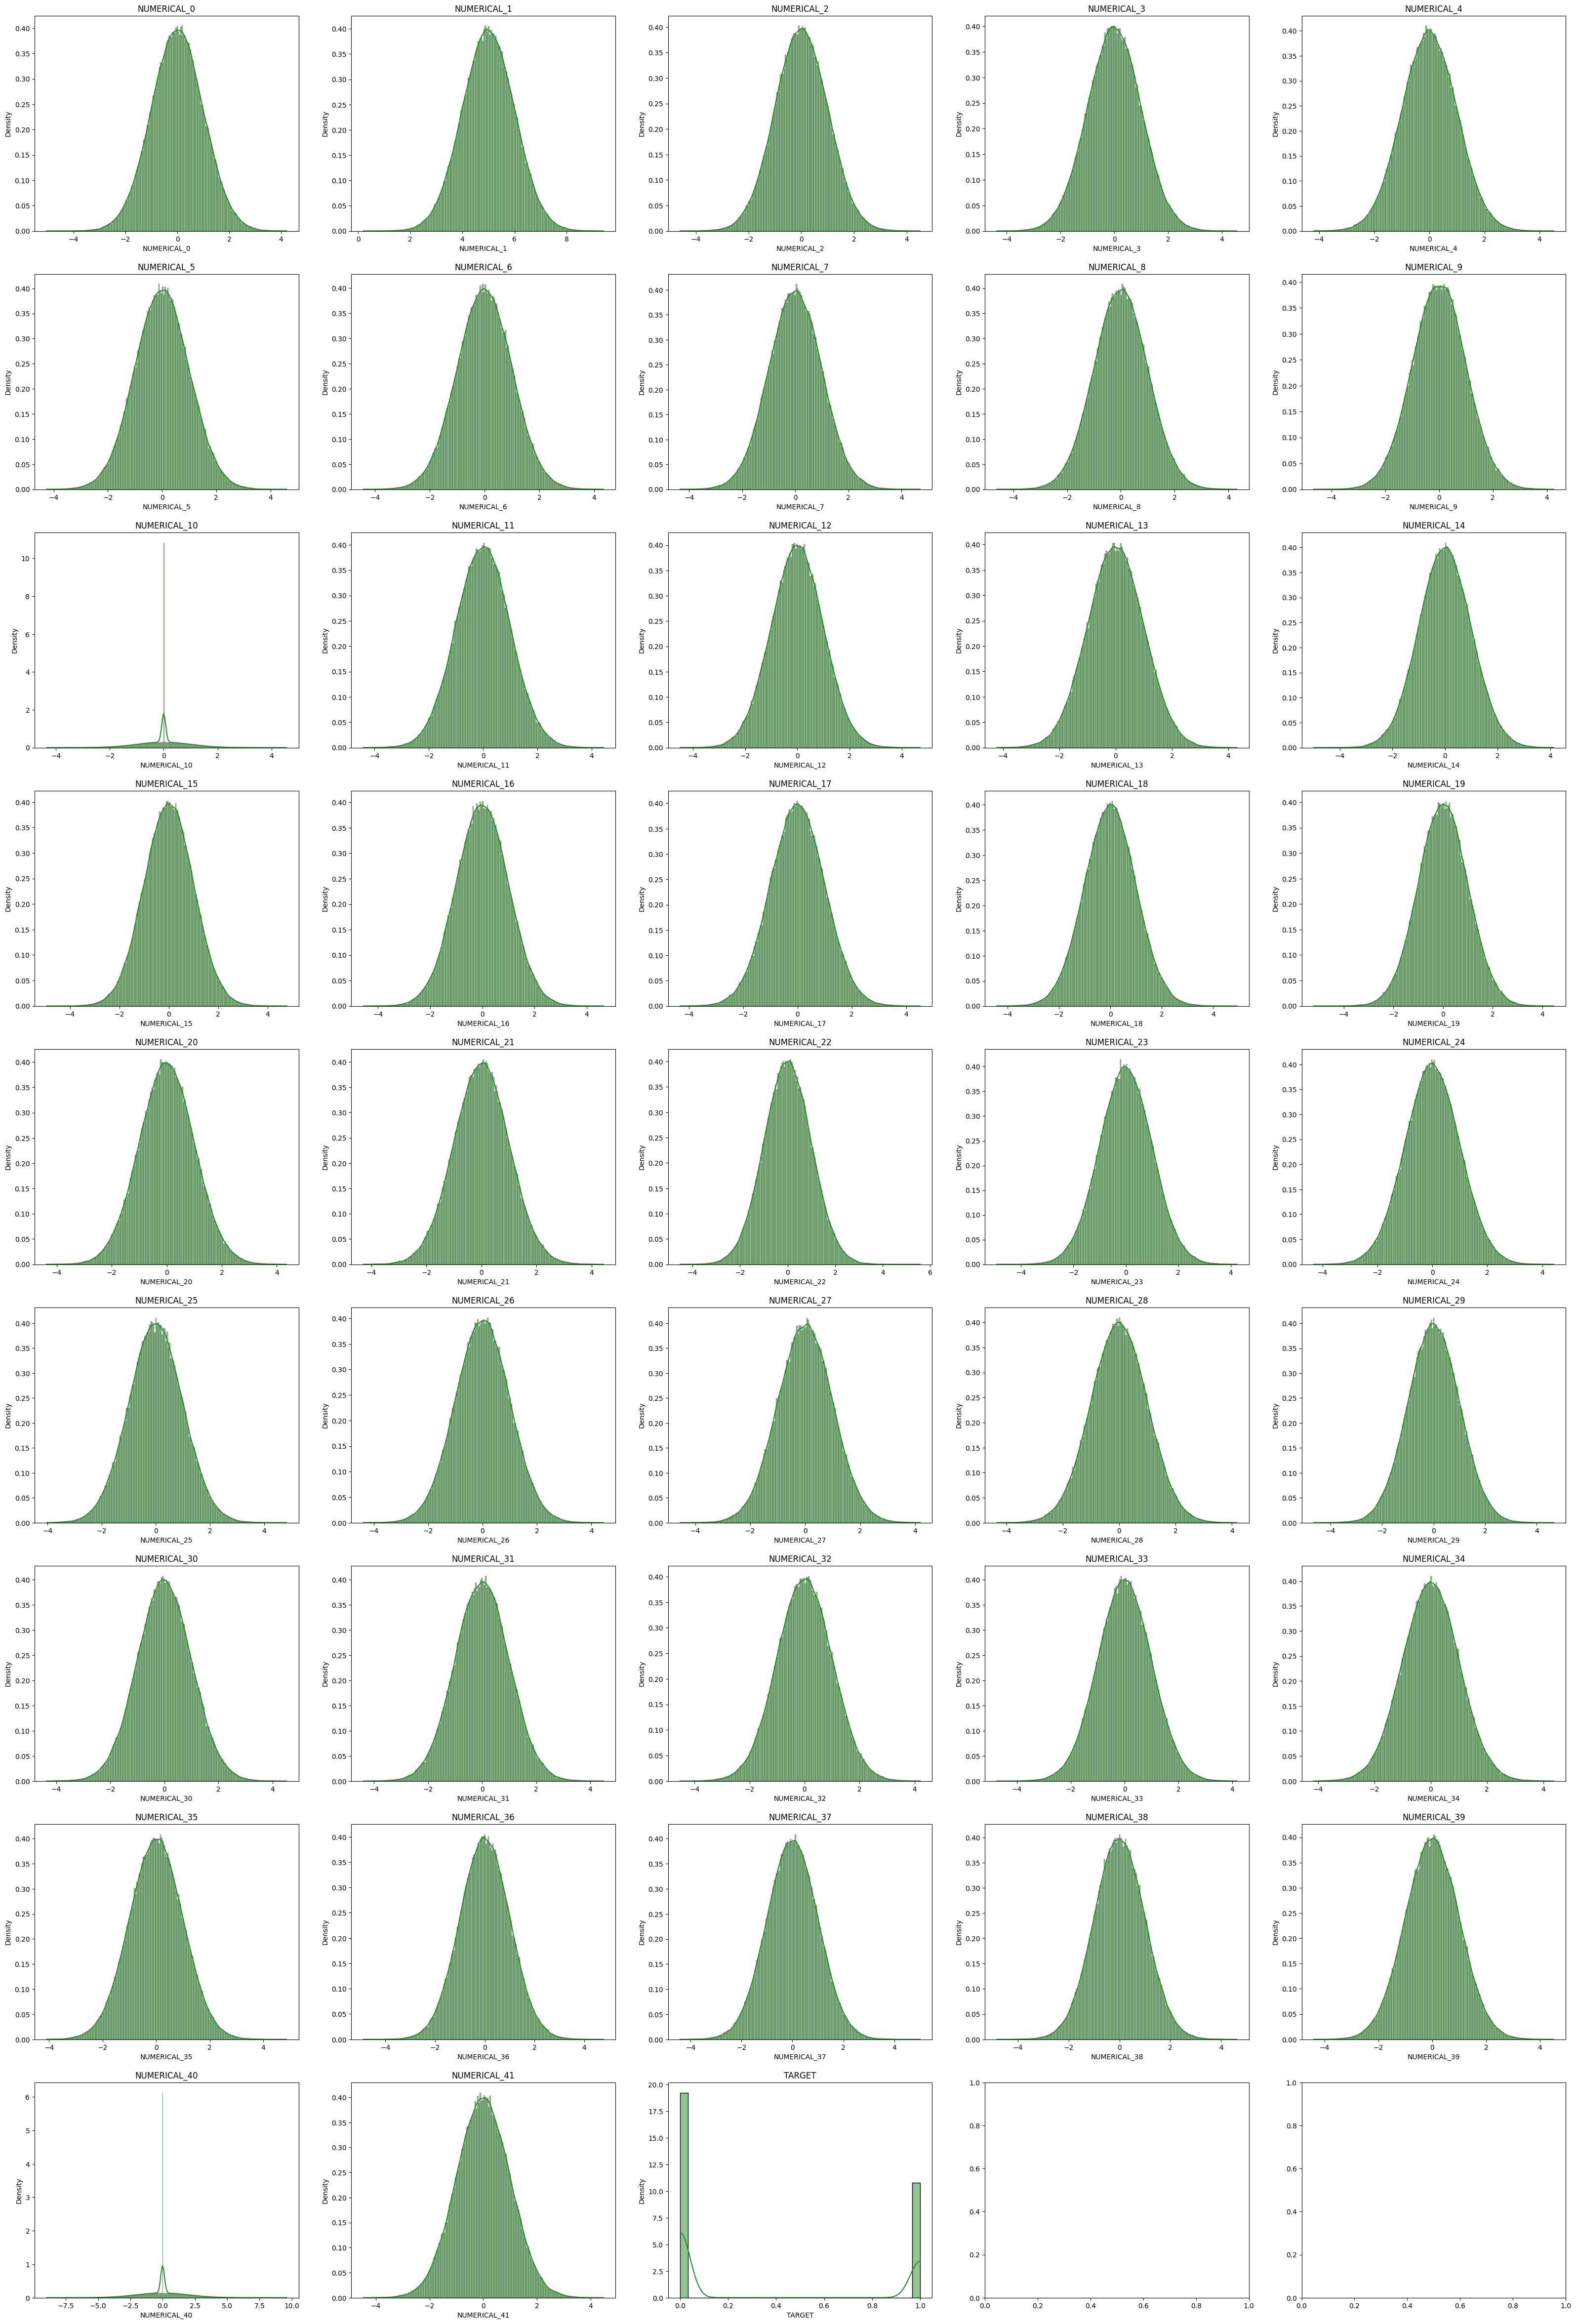

In [13]:
fig, axes = plt.subplots(nrows = 9, ncols = 5)    # axes is 2d array (9x5)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(40, 60)

for ax, col in zip(axes, num_features + ['TARGET']):
  sns.histplot(df_processed_v1[col], ax = ax, color='forestgreen', kde=True, stat='density')
  ax.set_title(col)

In [14]:
len(cat_features)

11

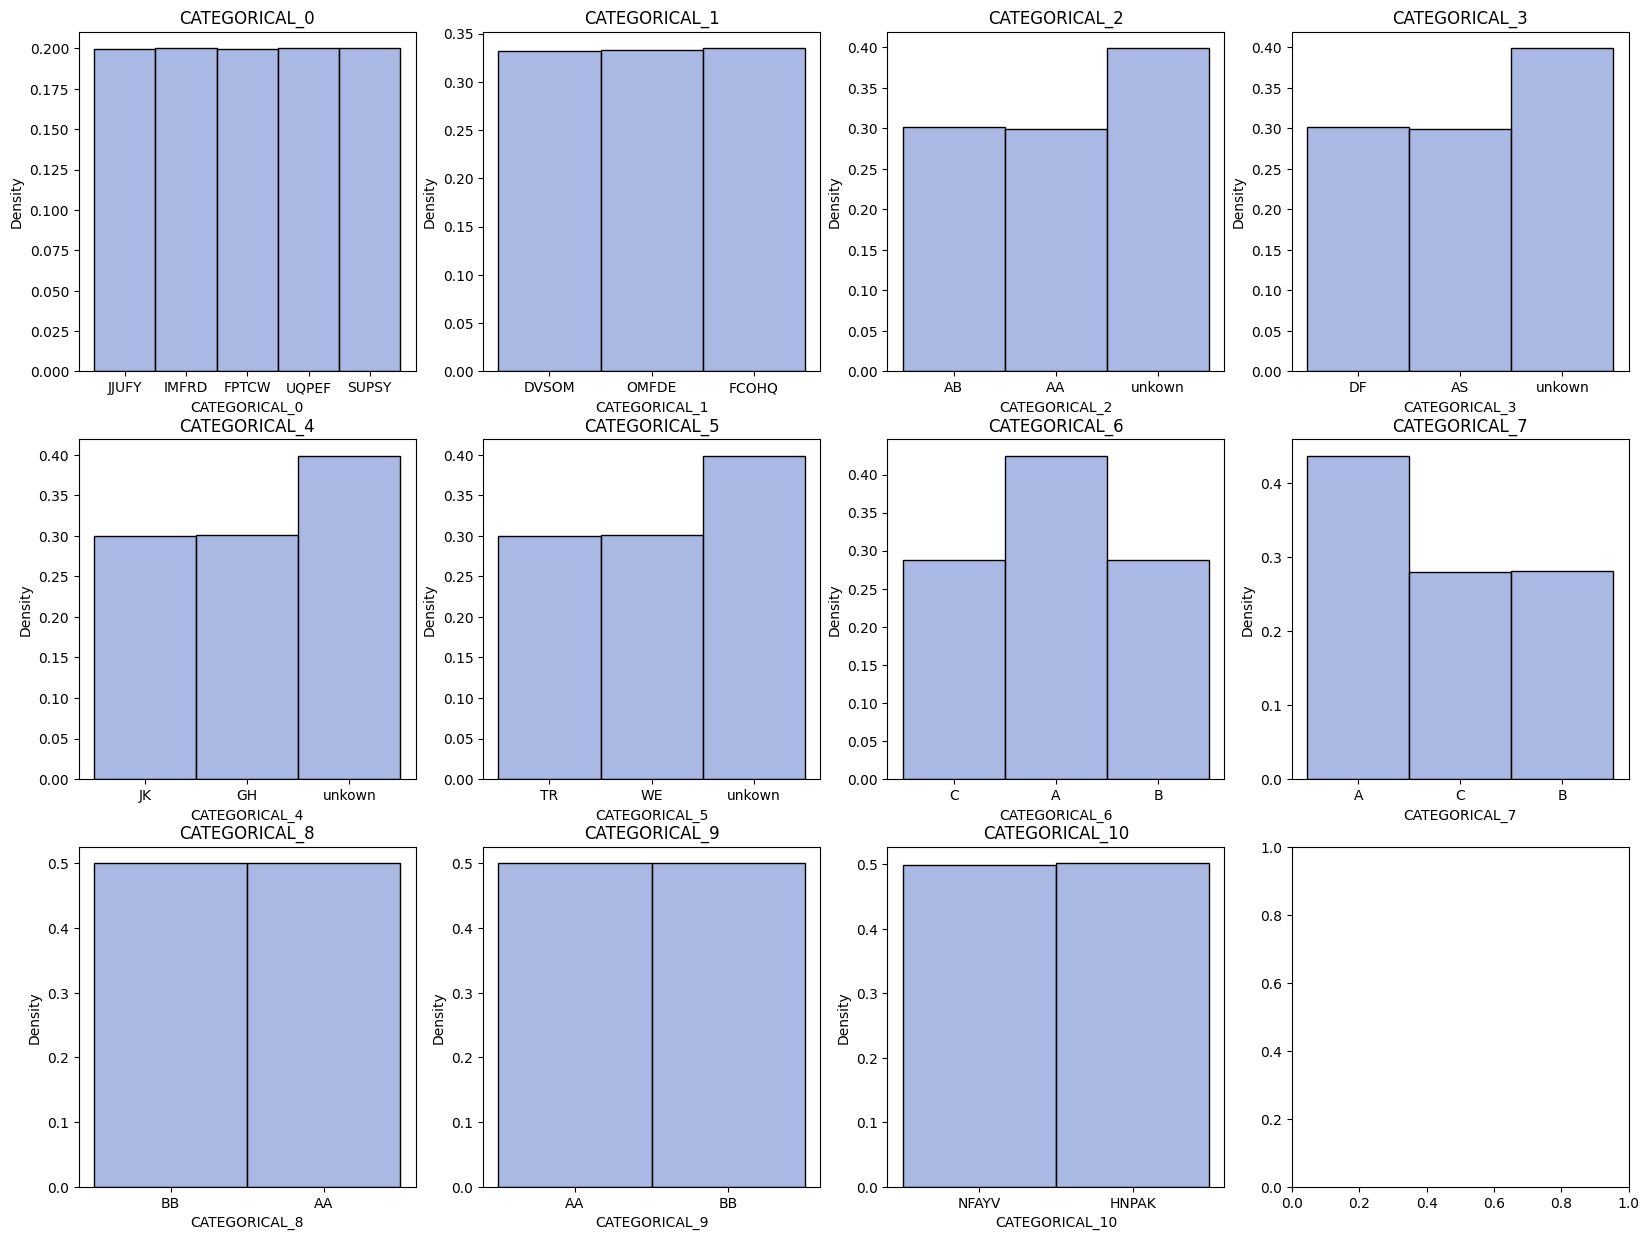

In [15]:
fig, axes = plt.subplots(nrows = 3, ncols = 4)    # axes is 2d array (9x5)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 15)

for ax, col in zip(axes, cat_features):
  sns.histplot(df_processed_v1[col], ax = ax, color='#8ea0db', stat='density')
  ax.set_title(col)

### Time range

<Axes: xlabel='DATE_APPLICATION'>

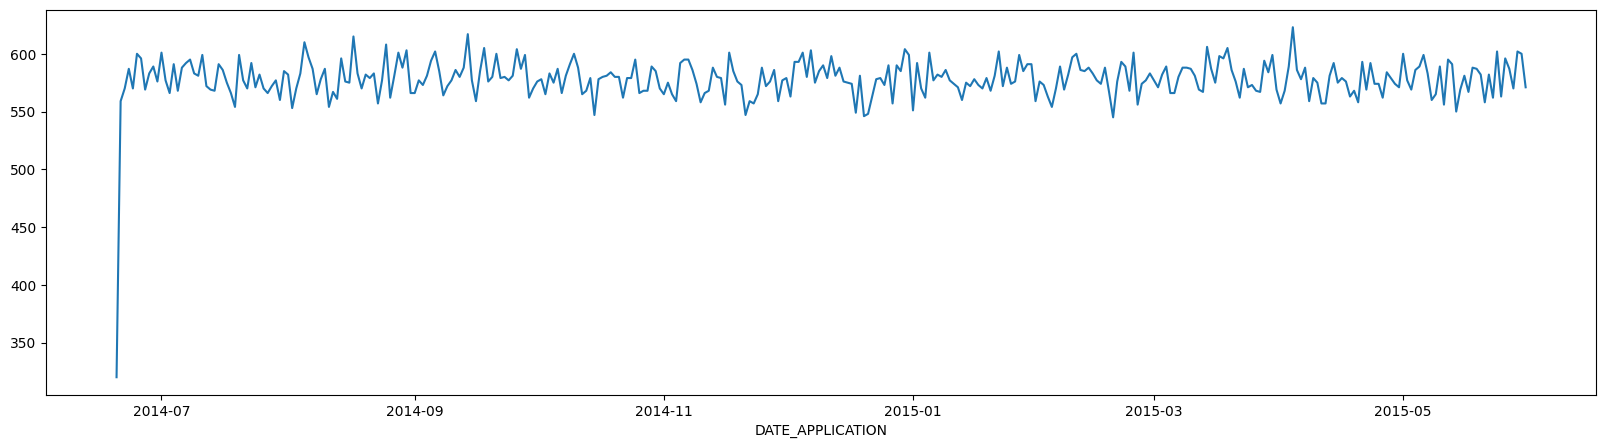

In [16]:
df_processed_v1.groupby(df_processed_v1['DATE_APPLICATION']).size().plot(figsize=(20, 5))

June 2014 data is not completed.

<Axes: xlabel='DATE_APPLICATION'>

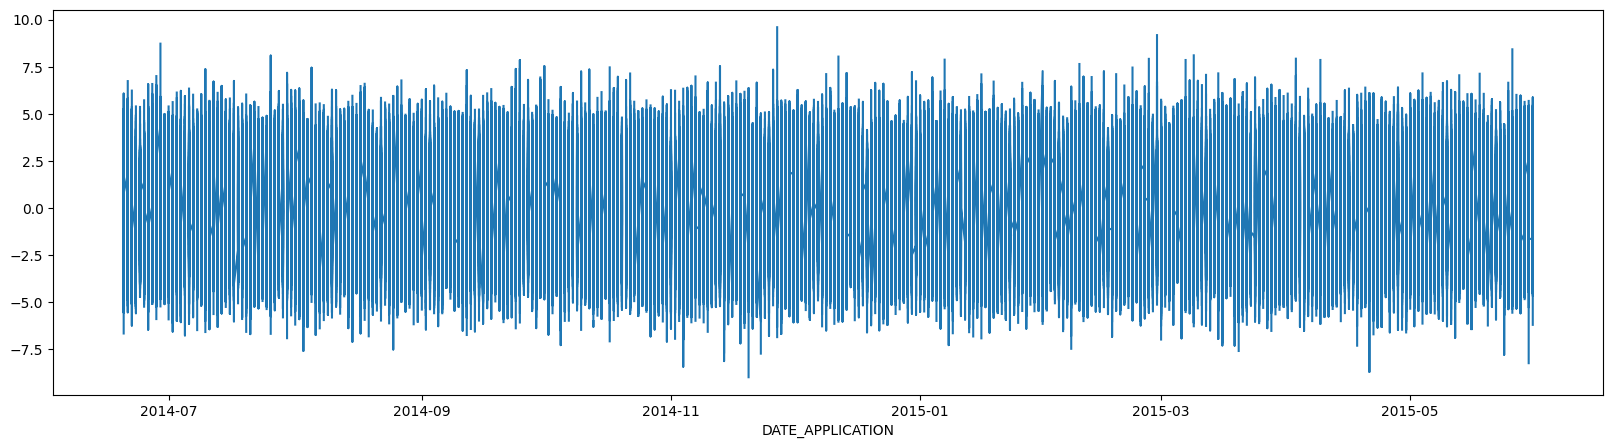

In [17]:
df_raw.set_index('DATE_APPLICATION')['NUMERICAL_40'].plot(figsize=(20, 5))

<Axes: xlabel='DATE_APPLICATION'>

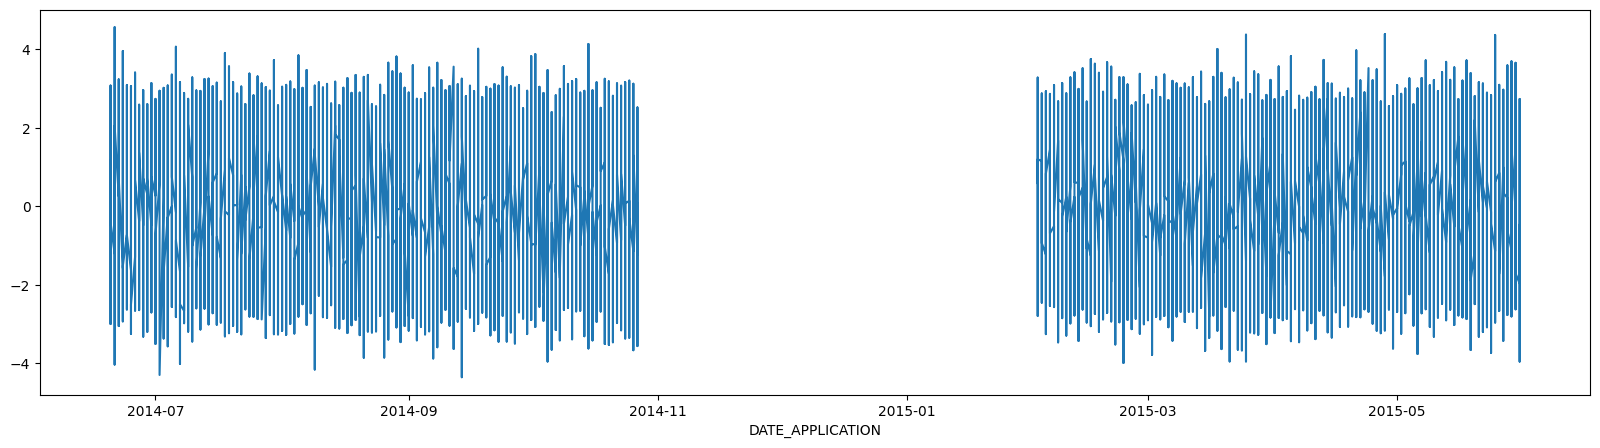

In [18]:
df_raw.set_index('DATE_APPLICATION')['NUMERICAL_10'].plot(figsize=(20, 5))

Missing Data

June 2014 data is not completed.

NUMERICAL_10 has null value in a long period of time -> have to get rid of this feature. If filling null with any constaent, it might lead to big bias for this period of time in prediction.

NUMERICAL_40 already has too many 0 values -> should not filling null with more 0 to decrease bias on 0.

Solution: 
- Remove NUMERICAL_10 from feature list.
- NUMERICAL_40 fill null with mean value of the last 30 days (could be another time range, but with limited time for testing).

## Fill Null Numerical v2 (mean in last 30 days)

### Mean and Standard deviations of last 30 days for each ID_APPLICATION

In [19]:
# reset filling null, cate cols still have null values
df_mean_std = df_raw.copy()

# remove NUMERICAL_10 due to null values in long period of time
df_mean_std.drop(labels='NUMERICAL_10', axis=1, inplace=True)

date_list = df_mean_std['DATE_APPLICATION'].unique()
date_list.sort()
print(date_list)

[datetime.date(2014, 6, 20) datetime.date(2014, 6, 21)
 datetime.date(2014, 6, 22) datetime.date(2014, 6, 23)
 datetime.date(2014, 6, 24) datetime.date(2014, 6, 25)
 datetime.date(2014, 6, 26) datetime.date(2014, 6, 27)
 datetime.date(2014, 6, 28) datetime.date(2014, 6, 29)
 datetime.date(2014, 6, 30) datetime.date(2014, 7, 1)
 datetime.date(2014, 7, 2) datetime.date(2014, 7, 3)
 datetime.date(2014, 7, 4) datetime.date(2014, 7, 5)
 datetime.date(2014, 7, 6) datetime.date(2014, 7, 7)
 datetime.date(2014, 7, 8) datetime.date(2014, 7, 9)
 datetime.date(2014, 7, 10) datetime.date(2014, 7, 11)
 datetime.date(2014, 7, 12) datetime.date(2014, 7, 13)
 datetime.date(2014, 7, 14) datetime.date(2014, 7, 15)
 datetime.date(2014, 7, 16) datetime.date(2014, 7, 17)
 datetime.date(2014, 7, 18) datetime.date(2014, 7, 19)
 datetime.date(2014, 7, 20) datetime.date(2014, 7, 21)
 datetime.date(2014, 7, 22) datetime.date(2014, 7, 23)
 datetime.date(2014, 7, 24) datetime.date(2014, 7, 25)
 datetime.date(2014

In [20]:
# remove NUMERICAL_10 due to null values in long period of time
num_features.remove('NUMERICAL_10')

In [21]:
import datetime

In [22]:
# exclude first 30 days
first_30_days = date_list[0] + datetime.timedelta(days=30)
first_30_days

datetime.date(2014, 7, 20)

In [23]:
df_mean_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID_APPLICATION          200000 non-null  int64         
 1   TIME                    200000 non-null  object        
 2   NUMERICAL_0             200000 non-null  float64       
 3   NUMERICAL_1             200000 non-null  float64       
 4   NUMERICAL_2             200000 non-null  float64       
 5   NUMERICAL_3             200000 non-null  float64       
 6   NUMERICAL_4             200000 non-null  float64       
 7   NUMERICAL_5             200000 non-null  float64       
 8   NUMERICAL_6             200000 non-null  float64       
 9   NUMERICAL_7             200000 non-null  float64       
 10  NUMERICAL_8             200000 non-null  float64       
 11  NUMERICAL_9             200000 non-null  float64       
 12  NUMERICAL_11            200000

In [24]:
# mean and std last 30 days
# mean for filling null
# std for create new features of std deviation

mean_cols = [i + '_mean_last_30_days' for i in num_features]
std_cols = [i + '_std_last_30_days' for i in num_features]

df_processed_v2 = pd.DataFrame()

# run 1 day at a time
for d in date_list:
    # ignore first 30 days because not enough data to calcualte last 30 days mean and std
    if d >= first_30_days:
        df_one_date =  df_mean_std.loc[df_mean_std['DATE_APPLICATION'] == d]
        
        last_30_days = d - datetime.timedelta(days=30)

        df_30_days = df_mean_std.loc[(df_mean_std['DATE_APPLICATION'] > last_30_days) & (df_mean_std['DATE_APPLICATION'] <= d)]

        # aggregate 30 days of rows into 1 row, then assign to all row of df_one_date
        for num_c, mean_c, std_c in zip(num_features, mean_cols, std_cols):
            df_one_date[mean_c] = df_30_days.loc[df_30_days[num_c].notnull(), num_c].mean()
            df_one_date[std_c] = df_30_days.loc[df_30_days[num_c].notnull(), num_c].std()

        # concat multiple df_one_date into 1 df with mean and std columns
        try:
            df_processed_v2 = pd.concat([df_processed_v2, df_one_date])
        except:
            df_processed_v2 = df_one_date.copy()

In [25]:
df_processed_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182859 entries, 17141 to 199999
Columns: 145 entries, ID_APPLICATION to NUMERICAL_41_std_last_30_days
dtypes: datetime64[ns](1), float64(123), int32(5), int64(2), object(14)
memory usage: 200.2+ MB


### Filling null v2 for NUMERICAL

In [26]:
# Numerical -> mean of last 30 days
for c, mean_c in zip(num_features, mean_cols):
    if df_processed_v2[c].isnull().any():
        # NUMERICAL_10 and NUMERICAL_40 have too many null values (filled with 0). which makes these 2 featuers bias if replacing null with a fixed value.
        # Solution: fill null with mean value of the last 30 days (could be another time range, but with limited time for testing).
        df_processed_v2[c].fillna(value=df_processed_v2[mean_c], inplace=True)

Text(0.5, 1.0, 'NUMERICAL_40')

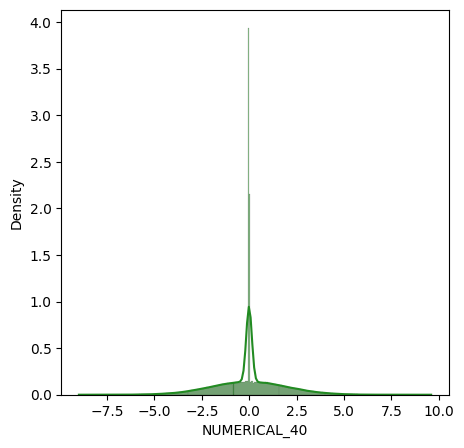

In [27]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)    # axes is 2d array (9x5)
# axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(5, 5)

col = 'NUMERICAL_40'

sns.histplot(df_processed_v2[col], ax = axes, color='forestgreen', kde=True, stat='density')
ax.set_title(col)

NUMERICAL_40 bias on 0 only reduced by a little (Density reduced) because there were already a lot of 0 values before filling null.

## Standard Deviation Features

In [28]:
for num_c, mean_c, std_c in zip(num_features, mean_cols, std_cols):
    std_dev_c = num_c + '_std_dev_last_30_days'

    df_processed_v2[std_dev_c] = (df_processed_v2[num_c] - df_processed_v2[mean_c]) / df_processed_v2[std_c]

    if df_processed_v2[std_dev_c].isnull().any():
        df_processed_v2[std_dev_c].fillna(value=0, inplace=True)

df_processed_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182859 entries, 17141 to 199999
Columns: 186 entries, ID_APPLICATION to NUMERICAL_41_std_dev_last_30_days
dtypes: datetime64[ns](1), float64(164), int32(5), int64(2), object(14)
memory usage: 257.4+ MB


In [29]:
df_processed_v2[['NUMERICAL_40', 'NUMERICAL_40_std_dev_last_30_days', 'DATE_APPLICATION']].sample(10)

,NUMERICAL_40,NUMERICAL_40_std_dev_last_30_days,DATE_APPLICATION
186268,-0.016918,0.000000,2015-05-08
129545,1.611324,0.803032,2015-01-30
28850,0.258203,0.141052,2014-08-09
73923,-1.156913,-0.576077,2014-10-25
29260,-0.023575,0.000000,2014-08-09
116551,-4.737707,-2.369488,2015-01-07
87751,-2.676821,-1.318332,2014-11-18
44497,-3.312569,-1.659719,2014-09-05
131914,-3.073976,-1.537708,2015-02-03
94945,1.296656,0.646121,2014-12-01


## Dummy Encoding for Categorical

In [30]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from collections import Counter

import sys

In [31]:
# astype('unicode') does not work as expected
def coerce_to_unicode(x):
    if sys.version_info < (3, 0):
        if isinstance(x, str):
            return unicode(x,'utf-8')
        else:
            return unicode(x)
    else:
        return str(x)

df_encoding = df_processed_v2.copy()

LIMIT_DUMMIES = 100

categorical_to_dummy_encode = cat_features.copy() + cat_time_col.copy()

# Only keep the top 100 values
def select_dummy_values(df_encoding, features):
    dummy_values = {}
    for feature in categorical_to_dummy_encode:
        values = [
            value
            for (value, _) in Counter(df_encoding[feature]).most_common(LIMIT_DUMMIES)
        ]
        dummy_values[feature] = values
    return dummy_values

DUMMY_VALUES = select_dummy_values(df_encoding, categorical_to_dummy_encode)

def dummy_encode_dataframe(df):
    for (feature, dummy_values) in DUMMY_VALUES.items():
        for dummy_value in dummy_values:
            dummy_name = u'%s_value_%s' % (feature, coerce_to_unicode(dummy_value))
            df[dummy_name] = (df[feature] == dummy_value).astype(float)
        del df[feature]
        print (f'Dummy-encoded feature {feature}')

dummy_encode_dataframe(df_encoding)
df_encoding.sample(5)

Dummy-encoded feature CATEGORICAL_0
Dummy-encoded feature CATEGORICAL_1
Dummy-encoded feature CATEGORICAL_2
Dummy-encoded feature CATEGORICAL_3
Dummy-encoded feature CATEGORICAL_4
Dummy-encoded feature CATEGORICAL_5
Dummy-encoded feature CATEGORICAL_6
Dummy-encoded feature CATEGORICAL_7
Dummy-encoded feature CATEGORICAL_8
Dummy-encoded feature CATEGORICAL_9
Dummy-encoded feature CATEGORICAL_10
Dummy-encoded feature MONTH_APPLICATION
Dummy-encoded feature DAY_APPLICATION
Dummy-encoded feature DOW_APPLICATION


,ID_APPLICATION,TIME,NUMERICAL_0,NUMERICAL_1,NUMERICAL_2,NUMERICAL_3,NUMERICAL_4,NUMERICAL_5,NUMERICAL_6,NUMERICAL_7,...,DAY_APPLICATION_value_2,DAY_APPLICATION_value_11,DAY_APPLICATION_value_31,DOW_APPLICATION_value_6,DOW_APPLICATION_value_4,DOW_APPLICATION_value_1,DOW_APPLICATION_value_3,DOW_APPLICATION_value_5,DOW_APPLICATION_value_2,DOW_APPLICATION_value_0
139051,139051,2015-02-15 16:05:21,-0.663409,5.206535,-0.516552,-0.088284,-0.055662,-2.143694,-0.740731,-0.218465,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
197692,197692,2015-05-28 01:32:36,-0.710517,4.276989,1.084564,1.102709,-0.408603,-1.971787,0.234079,0.007562,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
121609,121609,2015-01-16 14:07:09,0.144018,3.282684,0.105003,1.245174,0.481420,0.556157,0.974333,-0.238912,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39778,39778,2014-08-28 02:41:54,0.224749,4.575446,1.846533,-1.357560,-0.294941,-0.136662,0.216549,0.583826,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21910,21910,2014-07-28 05:33:07,1.056678,5.474308,0.155406,-0.164353,1.174995,0.164671,-1.058141,-0.943181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train Classification Models

### Dataset Split (Traing/Test)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [33]:
# fixed random_state to keep model result stable
random_state = 21321312

In [34]:
exclude_col = ['ID_APPLICATION',
               'TIME', 
                'TIME_FORMAT', 
                'DATE_APPLICATION', 
                'YEAR_MONTH_APPLICATION', 
                'YEAR_APPLICATION',
                'TARGET',
                'TIME'
                ] + mean_cols + std_cols

features =  list(set(df_encoding.columns).difference(exclude_col))

features.sort()

print(features)

print(len(features))

['CATEGORICAL_0_value_FPTCW', 'CATEGORICAL_0_value_IMFRD', 'CATEGORICAL_0_value_JJUFY', 'CATEGORICAL_0_value_SUPSY', 'CATEGORICAL_0_value_UQPEF', 'CATEGORICAL_10_value_HNPAK', 'CATEGORICAL_10_value_NFAYV', 'CATEGORICAL_1_value_DVSOM', 'CATEGORICAL_1_value_FCOHQ', 'CATEGORICAL_1_value_OMFDE', 'CATEGORICAL_2_value_AA', 'CATEGORICAL_2_value_AB', 'CATEGORICAL_2_value_unkown', 'CATEGORICAL_3_value_AS', 'CATEGORICAL_3_value_DF', 'CATEGORICAL_3_value_unkown', 'CATEGORICAL_4_value_GH', 'CATEGORICAL_4_value_JK', 'CATEGORICAL_4_value_unkown', 'CATEGORICAL_5_value_TR', 'CATEGORICAL_5_value_WE', 'CATEGORICAL_5_value_unkown', 'CATEGORICAL_6_value_A', 'CATEGORICAL_6_value_B', 'CATEGORICAL_6_value_C', 'CATEGORICAL_7_value_A', 'CATEGORICAL_7_value_B', 'CATEGORICAL_7_value_C', 'CATEGORICAL_8_value_AA', 'CATEGORICAL_8_value_BB', 'CATEGORICAL_9_value_AA', 'CATEGORICAL_9_value_BB', 'DAY_APPLICATION_value_1', 'DAY_APPLICATION_value_10', 'DAY_APPLICATION_value_11', 'DAY_APPLICATION_value_12', 'DAY_APPLICATI

In [35]:
df_train = df_encoding.loc[df_encoding['DATE_APPLICATION'] < datetime.date(2015, 5, 1)]

train_X = df_train[features]
train_Y = np.array(df_train['TARGET'])

# shuffle for LogisticsRegression. RandomForest already shuffle input in training algo.
train_X, train_Y = shuffle(train_X, train_Y, random_state=random_state)



print('tran + val', len(df_train))

# May 2015 for test
df_test = df_encoding.loc[df_encoding['DATE_APPLICATION'] >= datetime.date(2015, 5, 1)]

test_X = df_test[features]
test_Y = np.array(df_test['TARGET'])

print('test', len(df_test))


tran + val 164883
test 17976


### Select Models

In [36]:
from scipy.stats import randint, uniform

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

import time

In [37]:
clf_lg = LogisticRegression(penalty='l2', # {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
                            random_state=random_state,
                            solver='lbfgs', #{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
                            max_iter=200,
                            verbose=2,
                            n_jobs=-1, # default=None
                            )

In [38]:
clf_rf = RandomForestClassifier(n_estimators=293,
                                random_state=random_state,
                                criterion='gini', # {“gini”, “entropy”}
                                max_depth=16,
                                min_samples_split=2, # default=2
                                min_samples_leaf=13, # default=1
                                verbose=2,
                                class_weight='balanced', # default=None
                                n_jobs=-1, # default=None
                                warm_start=False # reuse the solution of the previous call to fit as initialization
                                )

### Train Models

In [40]:
import pickle

In [39]:
# for logging training results
try:
    df_model_performance = pd.read_excel(os.path.join('models', 'model_performance.xlsx'), index_col=False)

except:
    df_model_performance = pd.DataFrame(columns=['model_name',
                                                'best_score',
                                                'best_param',
                                                'train_at'
                                                ])

df_model_performance

,Unnamed: 0,model_name,best_score,best_param,train_at
0,0,LogisticRegression,0.871140,{'clf__max_iter': 195},2023-09-26 07:58:32
1,1,RandomForestClassifier,0.894165,"{'clf__max_depth': 14, 'clf__n_estimators': 474}",2023-09-26 08:01:25
2,2,LogisticRegression,0.871140,{'clf__max_iter': 61},2023-09-26 08:03:00
3,3,RandomForestClassifier,0.887148,"{'clf__max_depth': 12, 'clf__n_estimators': 29}",2023-09-26 08:03:14
4,4,LogisticRegression,0.871140,{'clf__max_iter': 58},2023-09-26 08:05:32
5,5,RandomForestClassifier,0.890598,"{'clf__max_depth': 12, 'clf__n_estimators': 83}",2023-09-26 08:06:12


In [40]:
clf_list = [clf_lg, clf_rf]

param_distribs_lg = {
        'clf__max_iter': randint(low=16, high=96),
    }

param_distribs_rf = {
        'clf__n_estimators': randint(low=24, high=96),
        'clf__max_depth': randint(low=4, high=16),
    }

param_distribs_list = [param_distribs_lg, param_distribs_rf]


for clf, param_distribs in zip(clf_list, param_distribs_list):
        pipe = Pipeline([
                ('scale', StandardScaler()),
                ('clf', clf)])
        
        # =========================================================
        rnd_search = RandomizedSearchCV(pipe, 
                                        param_distributions=param_distribs,
                                        n_iter=2, # only take 5 values for each param
                                        cv=2, # cross-validation, k-fold=5

                                        scoring='roc_auc',
                                        # scoring='f1',
                                        # scoring='accuracy',
                                        # scoring='precision',
                                        # scoring='recall',
                                        # scoring='max_error',
                                        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

                                        # random_state=random_state,
                                        n_jobs=-1,
                                        verbose=0)
        
        
        rnd_search.fit(train_X, train_Y)
        best_model = rnd_search.best_estimator_

        # logging models performance
        # create a new DataFrame with some data
        new_data = pd.DataFrame({'model_name': [type(clf).__name__],
                                 'best_score': [rnd_search.best_score_], 
                                 'best_param': [rnd_search.best_params_],
                                 'train_at': [time.strftime('%Y-%m-%d %H:%M:%S')]})

        # append the new DataFrame to the existing DataFrame
        df_model_performance = pd.concat([df_model_performance, new_data], ignore_index=True)
        
        # =========================================================
        # model_name as folder for saving each models and their metrics
        # change everytime tuning models
        # os.environ['TZ'] = 'UTC-7'
        # time.tzset()
        model_name = type(clf).__name__


        models_dir = f'models'
        os.makedirs(models_dir, exist_ok=True)

        # Save to file in the current working directory
        with open(os.path.join(models_dir, f'{model_name}.pkl'), 'wb') as file:
            pickle.dump(best_model, file)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          165     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71444D+04    |proj g|=  1.34736D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          165     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71437D+04    |proj g|=  1.40848D+04

At iterate    1    f=  4.07622D+04    |proj g|=  7.16265D+03

At iterate    1    f=  4.07576D+04    |proj g|=  7.06515D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          165     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71437D+04    |proj g|=  1.40848D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          165     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=

/home/tekies/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/tekies/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi


At iterate   25    f=  3.50044D+04    |proj g|=  1.58301D+00

At iterate   28    f=  3.47783D+04    |proj g|=  1.46625D+00

At iterate   29    f=  3.47783D+04    |proj g|=  2.32357D+00

At iterate   26    f=  3.50044D+04    |proj g|=  6.08527D-01

At iterate   30    f=  3.47783D+04    |proj g|=  6.27230D+00

At iterate   27    f=  3.50044D+04    |proj g|=  9.29125D-01

At iterate   31    f=  3.47783D+04    |proj g|=  5.14302D+00

At iterate   28    f=  3.50044D+04    |proj g|=  9.01389D-01

At iterate   32    f=  3.47783D+04    |proj g|=  2.17142D+01

At iterate   29    f=  3.50044D+04    |proj g|=  3.04336D+00

At iterate   33    f=  3.47782D+04    |proj g|=  1.40328D+01

At iterate   30    f=  3.50044D+04    |proj g|=  8.25770D+00

At iterate   34    f=  3.47779D+04    |proj g|=  1.66149D+01

At iterate   31    f=  3.50044D+04    |proj g|=  6.89609D+00

At iterate   35    f=  3.47777D+04    |proj g|=  1.80007D+01

At iterate   32    f=  3.50044D+04    |proj g|=  7.59438D+00

At iter

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          165     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14288D+05    |proj g|=  2.75583D+04

At iterate    1    f=  8.15493D+04    |proj g|=  1.42213D+04

At iterate    2    f=  7.50921D+04    |proj g|=  9.30799D+03

At iterate    3    f=  7.23858D+04    |proj g|=  7.14520D+03

At iterate    4    f=  7.05385D+04    |proj g|=  3.45719D+03


 This problem is unconstrained.



At iterate    5    f=  7.00653D+04    |proj g|=  1.13770D+03

At iterate    6    f=  6.98943D+04    |proj g|=  4.22831D+02

At iterate    7    f=  6.98803D+04    |proj g|=  2.05462D+02

At iterate    8    f=  6.98773D+04    |proj g|=  9.35785D+01

At iterate    9    f=  6.98768D+04    |proj g|=  3.31919D+01

At iterate   10    f=  6.98767D+04    |proj g|=  1.63156D+01

At iterate   11    f=  6.98767D+04    |proj g|=  5.30412D+00

At iterate   12    f=  6.98766D+04    |proj g|=  7.27817D+00

At iterate   13    f=  6.98766D+04    |proj g|=  1.79157D+01

At iterate   14    f=  6.98765D+04    |proj g|=  5.03879D+01

At iterate   15    f=  6.98762D+04    |proj g|=  7.06311D+01

At iterate   16    f=  6.98754D+04    |proj g|=  1.26765D+02

At iterate   17    f=  6.98731D+04    |proj g|=  1.88258D+02

At iterate   18    f=  6.98687D+04    |proj g|=  3.31276D+02

At iterate   19    f=  6.98593D+04    |proj g|=  3.97250D+02

At iterate   20    f=  6.98507D+04    |proj g|=  5.40556D+02

At iter

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 89
building tree 2 of 89
building tree 3 of 89
building tree 4 of 89
building tree 5 of 89
building tree 6 of 89
building tree 7 of 89
building tree 8 of 89building tree 9 of 89
building tree 10 of 89
building tree 11 of 89
building tree 12 of 89

building tree 1 of 89
building tree 2 of 89
building tree 3 of 89
building tree 4 of 89
building tree 5 of 89
building tree 6 of 89
building tree 7 of 89
building tree 8 of 89building tree 9 of 89

building tree 10 of 89
building tree 11 of 89
building tree 12 of 89
building tree 1 of 91
building tree 2 of 91
building tree 3 of 91
building tree 4 of 91
building tree 5 of 91building tree 6 of 91

building tree 7 of 91
building tree 8 of 91
building tree 9 of 91
building tree 10 of 91
building tree 1 of 91
building tree 2 of 91building tree 3 of 91
building tree 4 of 91

building tree 5 of 91
building tree 6 of 91
building tree 7 of 91
building tree 11 of 91building tree 8 of 91
building tree 9 of 91building tree 12 of 91
bui

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.4s


building tree 14 of 89building tree 30 of 91

building tree 31 of 91
building tree 32 of 91
building tree 33 of 91
building tree 34 of 91
building tree 28 of 91
building tree 29 of 91
building tree 30 of 91
building tree 31 of 91
building tree 35 of 91
building tree 32 of 91


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.9s


building tree 36 of 91
building tree 33 of 91
building tree 15 of 89
building tree 37 of 91
building tree 38 of 91
building tree 34 of 91
building tree 39 of 91
building tree 35 of 91
building tree 36 of 91
building tree 14 of 89
building tree 40 of 91
building tree 37 of 91
building tree 16 of 89
building tree 15 of 89
building tree 16 of 89
building tree 17 of 89
building tree 38 of 91
building tree 17 of 89
building tree 18 of 89
building tree 18 of 89
building tree 19 of 89
building tree 20 of 89
building tree 41 of 91
building tree 19 of 89
building tree 20 of 89
building tree 42 of 91
building tree 21 of 89building tree 21 of 89

building tree 22 of 89
building tree 39 of 91
building tree 23 of 89
building tree 43 of 91
building tree 22 of 89
building tree 24 of 89
building tree 23 of 89
building tree 24 of 89
building tree 44 of 91
building tree 40 of 91
building tree 45 of 91
building tree 25 of 89
building tree 46 of 91
building tree 47 of 91
building tree 41 of 91
building tr

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.4s


building tree 30 of 89

building tree 65 of 91
building tree 60 of 91
building tree 66 of 91
building tree 67 of 91
building tree 61 of 91
building tree 31 of 89
building tree 62 of 91
building tree 63 of 91
building tree 64 of 91
building tree 65 of 91
building tree 68 of 91
building tree 28 of 89
building tree 69 of 91
building tree 66 of 91
building tree 67 of 91
building tree 70 of 91
building tree 29 of 89
building tree 30 of 89
building tree 71 of 91
building tree 32 of 89


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.5s


building tree 72 of 91
building tree 73 of 91
building tree 31 of 89
building tree 32 of 89
building tree 33 of 89
building tree 74 of 91
building tree 33 of 89
building tree 34 of 89
building tree 34 of 89
building tree 35 of 89
building tree 68 of 91
building tree 75 of 91
building tree 69 of 91
building tree 35 of 89
building tree 76 of 91
building tree 77 of 91
building tree 70 of 91
building tree 36 of 89
building tree 71 of 91
building tree 37 of 89building tree 72 of 91

building tree 73 of 91
building tree 78 of 91
building tree 79 of 91building tree 74 of 91
building tree 36 of 89building tree 37 of 89


building tree 75 of 91
building tree 80 of 91
building tree 76 of 91
building tree 77 of 91
building tree 81 of 91
building tree 78 of 91building tree 82 of 91

building tree 83 of 91
building tree 79 of 91
building tree 84 of 91
building tree 85 of 91
building tree 38 of 89
building tree 86 of 91
building tree 87 of 91
building tree 88 of 91
building tree 80 of 91
building tr

[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:   13.8s finished


building tree 45 of 89
building tree 45 of 89
building tree 46 of 89
building tree 46 of 89
building tree 47 of 89


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:   14.7s finished
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.3s


building tree 48 of 89
building tree 49 of 89
building tree 47 of 89
building tree 50 of 89
building tree 51 of 89
building tree 48 of 89


[Parallel(n_jobs=12)]: Done  91 out of  91 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 49 of 89
building tree 50 of 89


[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.4s


building tree 52 of 89


[Parallel(n_jobs=12)]: Done  91 out of  91 | elapsed:    0.6s finished


building tree 51 of 89
building tree 52 of 89
building tree 53 of 89
building tree 53 of 89
building tree 54 of 89
building tree 54 of 89
building tree 55 of 89
building tree 56 of 89
building tree 55 of 89
building tree 56 of 89
building tree 57 of 89
building tree 57 of 89building tree 58 of 89

building tree 59 of 89
building tree 60 of 89
building tree 58 of 89
building tree 59 of 89
building tree 61 of 89
building tree 60 of 89
building tree 62 of 89
building tree 63 of 89
building tree 61 of 89
building tree 64 of 89
building tree 65 of 89
building tree 62 of 89
building tree 66 of 89
building tree 67 of 89
building tree 63 of 89
building tree 68 of 89
building tree 69 of 89
building tree 64 of 89
building tree 65 of 89
building tree 66 of 89
building tree 70 of 89
building tree 67 of 89
building tree 68 of 89
building tree 69 of 89
building tree 70 of 89
building tree 71 of 89
building tree 72 of 89
building tree 73 of 89
building tree 71 of 89
building tree 74 of 89
building tr

[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:   24.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:   25.0s finished
[Parallel(n_jobs=12)]: Done  89 out of  89 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  89 out of  89 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 89
building tree 2 of 89
building tree 3 of 89
building tree 4 of 89
building tree 5 of 89
building tree 6 of 89
building tree 7 of 89
building tree 8 of 89
building tree 9 of 89
building tree 10 of 89
building tree 11 of 89
building tree 12 of 89
building tree 13 of 89
building tree 14 of 89
building tree 15 of 89
building tree 16 of 89
building tree 17 of 89
building tree 18 of 89
building tree 19 of 89
building tree 20 of 89
building tree 21 of 89
building tree 22 of 89
building tree 23 of 89
building tree 24 of 89
building tree 25 of 89
building tree 26 of 89
building tree 27 of 89
building tree 28 of 89
building tree 29 of 89
building tree 30 of 89


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.0s


building tree 31 of 89
building tree 32 of 89
building tree 33 of 89
building tree 34 of 89
building tree 35 of 89
building tree 36 of 89
building tree 37 of 89
building tree 38 of 89
building tree 39 of 89
building tree 40 of 89
building tree 41 of 89
building tree 42 of 89
building tree 43 of 89
building tree 44 of 89
building tree 45 of 89
building tree 46 of 89
building tree 47 of 89
building tree 48 of 89
building tree 49 of 89
building tree 50 of 89
building tree 51 of 89
building tree 52 of 89
building tree 53 of 89
building tree 54 of 89
building tree 55 of 89
building tree 56 of 89
building tree 57 of 89
building tree 58 of 89
building tree 59 of 89
building tree 60 of 89
building tree 61 of 89
building tree 62 of 89
building tree 63 of 89
building tree 64 of 89
building tree 65 of 89
building tree 66 of 89
building tree 67 of 89
building tree 68 of 89
building tree 69 of 89
building tree 70 of 89
building tree 71 of 89
building tree 72 of 89
building tree 73 of 89
building tr

[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:   19.9s finished


Super fast: LogisticRegression

Super slow: RandomForestClassifier

In [44]:
# df_model_performance.drop(columns=['Unnamed: 0'], inplace=True)

df_model_performance.to_excel(os.path.join('models', 'model_performance.xlsx'))

df_model_performance

,model_name,best_score,best_param,train_at
0,LogisticRegression,0.871140,{'clf__max_iter': 195},2023-09-26 07:58:32
1,RandomForestClassifier,0.894165,"{'clf__max_depth': 14, 'clf__n_estimators': 474}",2023-09-26 08:01:25
2,LogisticRegression,0.871140,{'clf__max_iter': 61},2023-09-26 08:03:00
3,RandomForestClassifier,0.887148,"{'clf__max_depth': 12, 'clf__n_estimators': 29}",2023-09-26 08:03:14
4,LogisticRegression,0.871140,{'clf__max_iter': 58},2023-09-26 08:05:32
5,RandomForestClassifier,0.890598,"{'clf__max_depth': 12, 'clf__n_estimators': 83}",2023-09-26 08:06:12
6,LogisticRegression,0.871140,{'clf__max_iter': 89},2023-09-26 10:44:12
7,RandomForestClassifier,0.887347,"{'clf__max_depth': 14, 'clf__n_estimators': 89}",2023-09-26 10:45:00


LogisticRegression number of interations stopped very early, at least before 58 epochs

In [86]:
df_train.groupby('TARGET').size()

TARGET
0    105764
1     59119
dtype: int64

## Model Metrics

In [45]:
# Load from file
# model_name = 'LogisticRegression'
model_name = 'RandomForestClassifier'

with open(os.path.join('models', f'{model_name}.pkl'), 'rb') as file:
    pickle_model = pickle.load(file)
    
_predictions = pickle_model.predict(test_X)
_probas = pickle_model.predict_proba(test_X)
predictions = pd.DataFrame(data=_predictions, index=test_X.index, columns=['predicted_value'])

probabilities = pd.DataFrame(data=_probas, index=test_X.index, columns=['probability_of_value_0',
                                                                        'probability_of_value_1',
                                                                        ])
# Build scored dataset
results_test = df_test.join(predictions, how='left')
results_test = results_test.join(probabilities, how='left')
results_test[['TARGET', 'predicted_value', 'probability_of_value_0', 'probability_of_value_1',]].sample(10)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  89 out of  89 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  89 out of  89 | elapsed:    0.0s finished


,TARGET,predicted_value,probability_of_value_0,probability_of_value_1
183564,1,0,0.771786,0.228214
196574,0,1,0.241826,0.758174
183481,1,0,0.928116,0.071884
191155,0,0,0.556187,0.443813
194254,0,0,0.900107,0.099893
186327,0,1,0.498183,0.501817
187095,1,0,0.703958,0.296042
187805,0,1,0.289646,0.710354
186950,0,0,0.831402,0.168598
183158,1,1,0.329829,0.670171


In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, hamming_loss, log_loss


In [43]:
try:
    classification_metrics_df = pd.read_excel(os.path.join('models', 'classification_models_metrics.xlsx'), index_col=False)
except:
    pass

In [54]:

# Threshold-dependent (current threshold = 0.5000)

# Accuracy
# Proportion of correct predictions (positive and negative) in the test set	0.7669
# (± 0.0130)
_accuracy = accuracy_score(test_Y, _predictions)

# Precision
# Proportion of positive predictions that were indeed positive (in the test set)	0.5426
# (± 0.0399)
_precision = precision_score(test_Y, _predictions, average='weighted')

# Recall
# Proportion of actual positive values found by the classifier	0.7737
# (± 0.0277)
_recall = recall_score(test_Y, _predictions, average='weighted')

# F1 Score
# Harmonic mean between Precision and Recall	0.6376
# (± 0.0284)
_f1 = f1_score(test_Y, _predictions, average='weighted')

# Hamming loss
# Fraction of labels that are incorrectly predicted (the lower the better)	0.2331
# (± 0.0130)
_hamming_loss = hamming_loss(test_Y, _predictions)

# Cost matrix gain
# Average gain per record that the test set (7043 rows) would yield given the specified gain for each outcome. Specified gains: TP = 1, TN = 0, FP = -0.3, FN = 0.	0.1528
# Matthews Correlation Coefficient
# Correlation coefficient between actual and predicted values.
# +1 = perfect, 0 = no correlation, -1 = perfect anti-correlation	0.4899
# (± 0.0288)

# Threshold-independent
# Log loss
# Error metric that takes into account the predicted probabilities (the lower the better)	0.4748
# (± 0.0218)
_log_loss = log_loss(test_Y, _probas)

# ROC - AUC Score
# Area under the ROC; from 0.5 (random model) to 1 (perfect model)	0.8468
# (± 0.0182)
roc_auc_score
_roc_auc = roc_auc_score(test_Y, _predictions, average='weighted')

# Calibration loss
# Average distance between calibration curve and diagonal.
# From 0 (perfectly calibrated) up to 0.5.	0.1372
# (± 0.0155)
data = {'model_name': model_name,
        'accuracy_score' : _accuracy,
        'precision_score' : _precision,
        'recall_score' : _recall,
        'f1_score' : _f1,
        'hamming_loss' : _hamming_loss,
        'log_loss' : _log_loss,
        'roc_auc_score' : _roc_auc,
        }
if 'classification_metrics_df' in globals():
    classification_metrics_df = pd.concat([classification_metrics_df, pd.DataFrame(data=[data],)], ignore_index=True)
else:
    classification_metrics_df = pd.DataFrame(data=[data])
    
# classification_metrics_df.drop(columns=['Unnamed: 0'], inplace=True)
classification_metrics_df.to_excel(os.path.join('models', 'classification_models_metrics.xlsx'))

classification_metrics_df

,model_name,accuracy_score,precision_score,recall_score,f1_score,hamming_loss,log_loss,roc_auc_score
0,RandomForestClassifier,0.647085,0.620799,0.647085,0.611187,0.352915,0.604822,0.565424
1,RandomForestClassifier,0.619826,0.583487,0.619826,0.581424,0.380174,0.634171,0.536179
2,LogisticRegression,0.608311,0.549541,0.608311,0.545910,0.391689,1.009945,0.507312
3,LogisticRegression,0.608311,0.549541,0.608311,0.545910,0.391689,1.009945,0.507312
4,RandomForestClassifier,0.631119,0.598731,0.631119,0.593354,0.368881,0.617635,0.547945
5,LogisticRegression,0.594960,0.541656,0.594960,0.545719,0.405040,0.972586,0.502939
6,RandomForestClassifier,0.579717,0.535138,0.579717,0.543559,0.420283,0.726096,0.497939


## Feature Importance

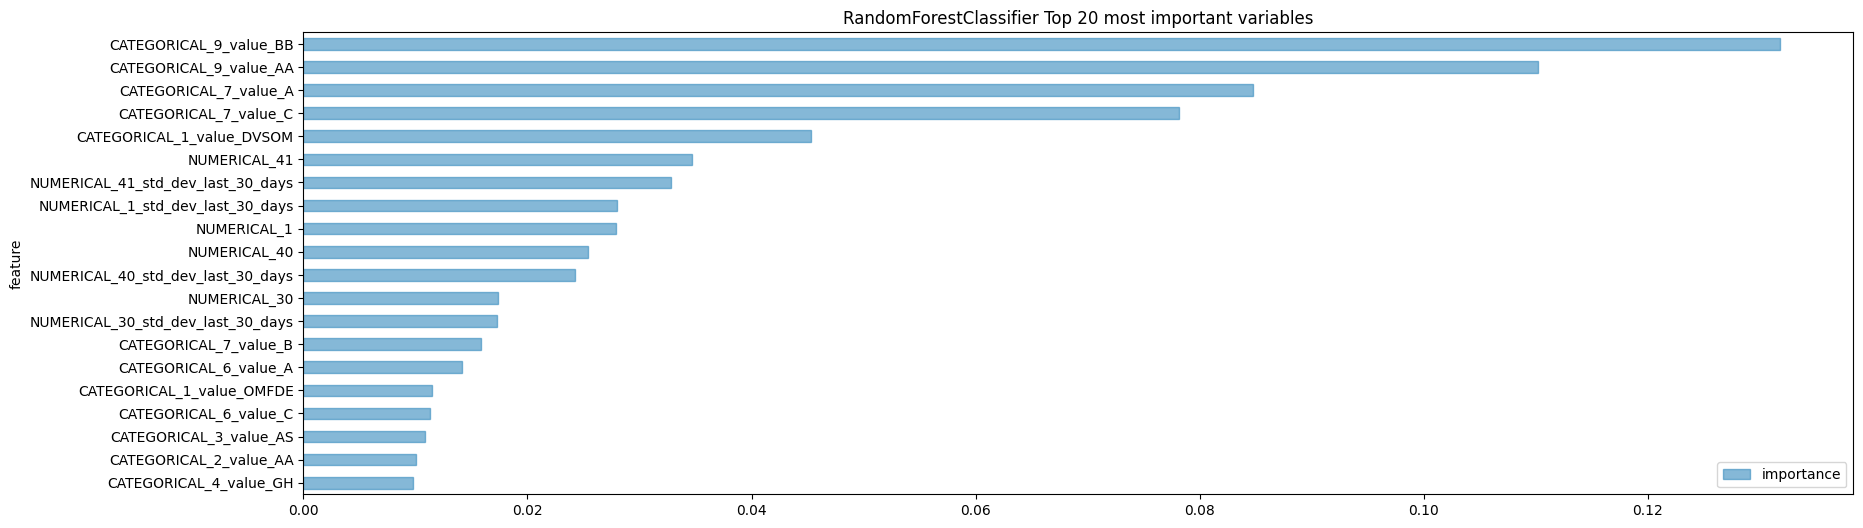

In [55]:
model_name = 'RandomForestClassifier'

with open(os.path.join('models', f'{model_name}.pkl'), 'rb') as file:
    pickle_model = pickle.load(file)

# Plot the results
feature_importances_df = pd.DataFrame({'feature': features, 'importance': pickle_model['clf'].feature_importances_})\
                        .set_index('feature')\
                        .sort_values(by='importance')

feature_importances_df[-20::].plot(title=f'{model_name} Top 20 most important variables',
                                kind='barh',
                                figsize=(20, 6),
                                color='#348ABD',
                                alpha=0.6,
                                lw=1,
                                edgecolor='#348ABD',
                                grid=False,)

plt.show()

feature_importances_df.sort_values(by='importance', ascending=False).to_excel(os.path.join('models', f'{model_name}_feature_importances.xlsx'))


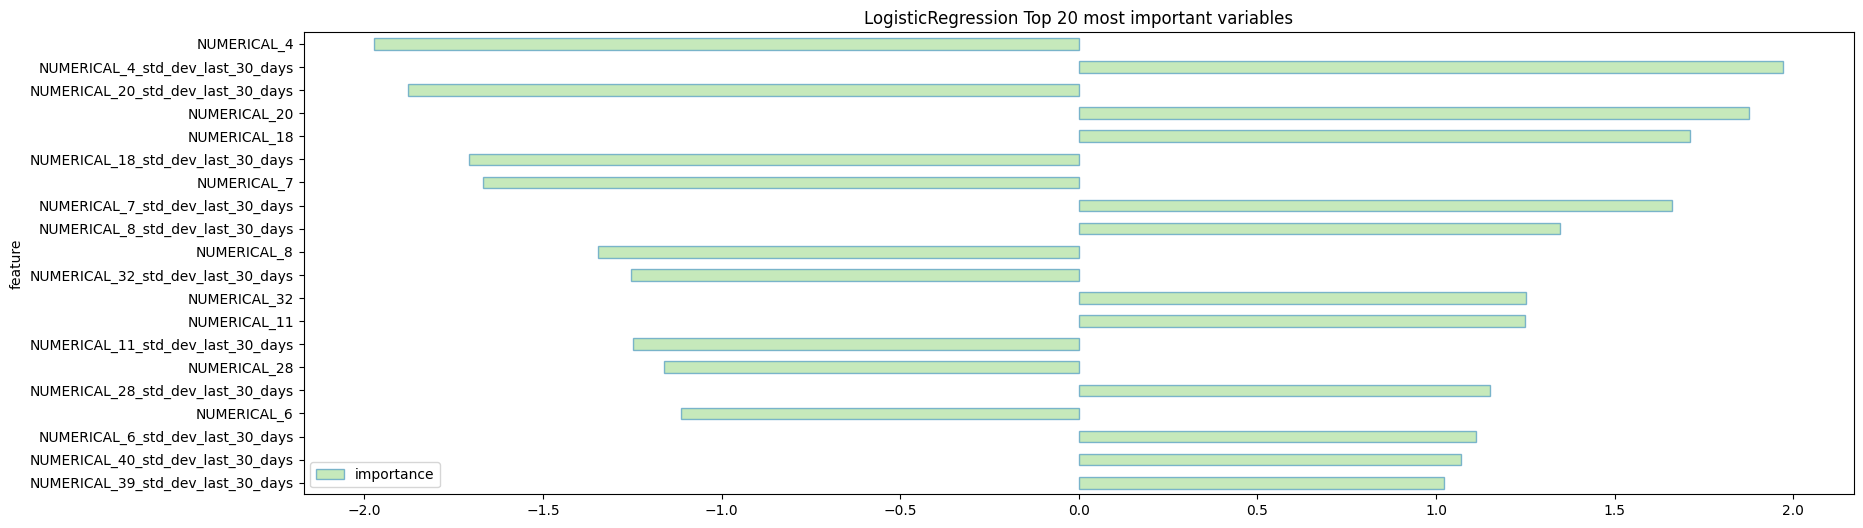

In [56]:
model_name = 'LogisticRegression'

with open(os.path.join('models', f'{model_name}.pkl'), 'rb') as file:
    pickle_model = pickle.load(file)

coefficients = pickle_model['clf'].coef_[0]

feature_importance = pd.DataFrame({'feature': features, 
                                   'abs_importance': np.abs(coefficients),
                                   'importance': coefficients,
                                   })\
                                .set_index('feature')\
                                .sort_values(by='abs_importance')

feature_importance.to_excel(os.path.join('models', f'{model_name}_feature_importances.xlsx'))

feature_importance[-20::].plot(title=f'{model_name} Top 20 most important variables',
                               y='importance',
                                kind='barh',
                                figsize=(20, 6),
                                color='#a0db8e',
                                alpha=0.6,
                                lw=1,
                                edgecolor='#348ABD',
                                grid=False,)

plt.show()

feature_importance.sort_values(by='abs_importance', ascending=False).to_excel(os.path.join('models', f'{model_name}_feature_importances.xlsx'))


RandomForestClassifier depends more on categorical than numberical features.

LogisticRegression is opposite, depends more on numberical than categorical features.